# Africa Credit Challenge

The goals of this `starter notebook` are:

1. How to load data into a `Pandas` dataframe

2. How to `train` a basic machine learning model

3. How to `evaluate` the model

4. How to `save` your __submission__ following the required format.

<font color="red"><b>Note: This is just a starter notebook. It is by no means an ideal solution.</b></font>

In [34]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Load and Inspect the data

In [4]:
# Loading the train dataset
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')
# Display the first few rows of the datasets and their shape
display("Train", train.head(), train.shape, "Test", test.head(), test.shape)

'Train'

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0


(68654, 16)

'Test'

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,7,Repeat Loan,575.7,0.300000,597.0
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.0,2153.0,2022-11-16,2022-11-23,7,Repeat Loan,0.0,0.000000,0.0
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.0,8304.0,2022-08-24,2022-08-31,7,Repeat Loan,207.0,0.025079,208.0
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.0,3379.0,2022-11-15,2022-11-22,7,Repeat Loan,1013.7,0.300000,1014.0
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.0,120.0,2022-11-10,2022-11-17,7,Repeat Loan,36.0,0.300000,36.0


(18594, 15)

In [5]:
# Check column types & missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_portion_F

In [6]:
# Are there missing values in the train dataset ?
print(f"There are {train.isna().sum().sum()} missing values in the data.")

There are 0 missing values in the data.


In [7]:
# Check column types & missing values
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18594 entries, 0 to 18593
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           18594 non-null  object 
 1   customer_id                  18594 non-null  int64  
 2   country_id                   18594 non-null  object 
 3   tbl_loan_id                  18594 non-null  int64  
 4   lender_id                    18594 non-null  int64  
 5   loan_type                    18594 non-null  object 
 6   Total_Amount                 18594 non-null  float64
 7   Total_Amount_to_Repay        18594 non-null  float64
 8   disbursement_date            18594 non-null  object 
 9   due_date                     18594 non-null  object 
 10  duration                     18594 non-null  int64  
 11  New_versus_Repeat            18594 non-null  object 
 12  Amount_Funded_By_Lender      18594 non-null  float64
 13  Lender_portion_F

In [8]:
# Are there missing values in the train dataset ?
print(f"There are {train.isna().sum().sum()} missing values in the data.")

There are 0 missing values in the data.


In [14]:
# Inspect unique values in categorical columns
categorical_columns = ['loan_type', 'New_versus_Repeat', 'country_id']
unique_values = {col: train[col].unique().tolist() for col in categorical_columns}
unique_values

{'loan_type': ['Type_1',
  'Type_7',
  'Type_5',
  'Type_4',
  'Type_6',
  'Type_14',
  'Type_9',
  'Type_10',
  'Type_19',
  'Type_16',
  'Type_2',
  'Type_11',
  'Type_23',
  'Type_18',
  'Type_17',
  'Type_12',
  'Type_20',
  'Type_13',
  'Type_21',
  'Type_15',
  'Type_24',
  'Type_22'],
 'New_versus_Repeat': ['Repeat Loan', 'New Loan'],
 'country_id': ['Kenya']}

In [13]:
# Inspect unique values in categorical columns
categorical_columns = ['loan_type', 'New_versus_Repeat', 'country_id']
unique_values1 = {col: test[col].unique().tolist() for col in categorical_columns}
unique_values1

{'loan_type': ['Type_1',
  'Type_7',
  'Type_3',
  'Type_2',
  'Type_10',
  'Type_6',
  'Type_23',
  'Type_14',
  'Type_5',
  'Type_4',
  'Type_17',
  'Type_9',
  'Type_12',
  'Type_8',
  'Type_11',
  'Type_18',
  'Type_24',
  'Type_22',
  'Type_20',
  'Type_15',
  'Type_21',
  'Type_13'],
 'New_versus_Repeat': ['Repeat Loan', 'New Loan'],
 'country_id': ['Kenya', 'Ghana']}

In [15]:
# Convert dates to datetime format
train['disbursement_date'] = pd.to_datetime(train['disbursement_date'], errors='coerce')
train['due_date'] = pd.to_datetime(train['due_date'], errors='coerce')

In [16]:
# Check for invalid date conversions
invalid_dates = {
    "Disbursement Date": train['disbursement_date'].isnull().sum(),
    "Due Date": train['due_date'].isnull().sum()
}

In [17]:
# Explore the target distribution
target_distribution = train['target'].value_counts(normalize=True).to_dict()

In [18]:
# Analyze numerical variables for outliers
numerical_columns = ['Total_Amount', 'Total_Amount_to_Repay', 'duration', 'Amount_Funded_By_Lender', 'Lender_portion_Funded']
numerical_summary = train[numerical_columns].describe().to_dict()

{
    "Unique Values in Categorical Columns": unique_values,
    "Invalid Dates Count": invalid_dates,
    "Target Distribution": target_distribution,
    "Numerical Summary": numerical_summary
}

{'Unique Values in Categorical Columns': {'loan_type': ['Type_1',
   'Type_7',
   'Type_5',
   'Type_4',
   'Type_6',
   'Type_14',
   'Type_9',
   'Type_10',
   'Type_19',
   'Type_16',
   'Type_2',
   'Type_11',
   'Type_23',
   'Type_18',
   'Type_17',
   'Type_12',
   'Type_20',
   'Type_13',
   'Type_21',
   'Type_15',
   'Type_24',
   'Type_22'],
  'New_versus_Repeat': ['Repeat Loan', 'New Loan'],
  'country_id': ['Kenya']},
 'Invalid Dates Count': {'Disbursement Date': np.int64(0),
  'Due Date': np.int64(0)},
 'Target Distribution': {0: 0.9816762315378565, 1: 0.0183237684621435},
 'Numerical Summary': {'Total_Amount': {'count': 68654.0,
   'mean': 14836.82861697789,
   'std': 141649.8683876975,
   'min': 2.0,
   '25%': 2295.0,
   '50%': 5249.0,
   '75%': 11450.0,
   'max': 23000000.0},
  'Total_Amount_to_Repay': {'count': 68654.0,
   'mean': 15639.929901243919,
   'std': 165078.35283049822,
   'min': 0.0,
   '25%': 2329.0,
   '50%': 5325.0,
   '75%': 11650.0,
   'max': 25415000.

### Outliers

In [19]:
# Cap Outliers for Selected Variables
def cap_outliers(series, lower_percentile=0.01, upper_percentile=0.99):
    lower_bound = np.percentile(series, lower_percentile * 100)
    upper_bound = np.percentile(series, upper_percentile * 100)
    return np.clip(series, lower_bound, upper_bound)


In [20]:
train['Total_Amount_Capped'] = cap_outliers(train['Total_Amount'])
train['Total_Amount_to_Repay_Capped'] = cap_outliers(train['Total_Amount_to_Repay'])

### Create Derived Features

In [21]:
# Loan tenure in days
train['Loan_Tenure_Days'] = (train['due_date'] - train['disbursement_date']).dt.days

In [22]:
# Repayment ratio
train['Repayment_Ratio'] = train['Total_Amount_to_Repay'] / train['Total_Amount_Capped']


### Simplify Categorical Variables

In [23]:
# Encode 'New_versus_Repeat'
train['New_versus_Repeat_Encoded'] = train['New_versus_Repeat'].map({'New Loan': 0, 'Repeat Loan': 1})

### Visual Exploration

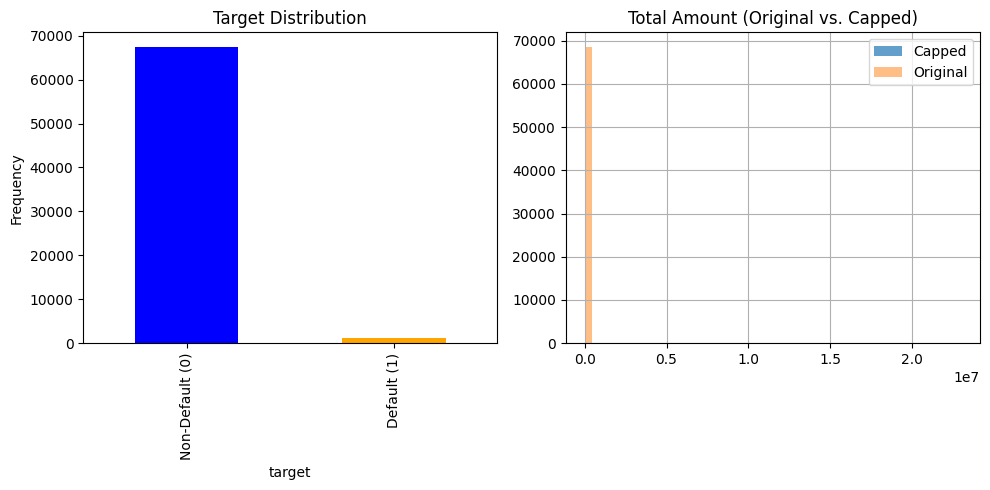

In [24]:
# Visualize target distribution and capped features
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
train['target'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Target Distribution')
plt.xticks(ticks=[0, 1], labels=['Non-Default (0)', 'Default (1)'])
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
train['Total_Amount_Capped'].hist(bins=50, alpha=0.7, label='Capped')
train['Total_Amount'].hist(bins=50, alpha=0.5, label='Original')
plt.title('Total Amount (Original vs. Capped)')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
# Display sample of engineered data
train[['Total_Amount_Capped', 'Loan_Tenure_Days', 'Repayment_Ratio', 'New_versus_Repeat_Encoded', 'target']].head()

,Total_Amount_Capped,Loan_Tenure_Days,Repayment_Ratio,New_versus_Repeat_Encoded,target
0,8448.0,7,1.000000,1,0
1,25895.0,7,1.003244,1,0
2,6900.0,7,1.035072,1,0
3,8958.0,7,1.030699,1,0
4,4564.0,7,1.035933,1,0


### Correlation matrix

In [28]:
# Correlation Analysis
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train[numeric_columns].corr()

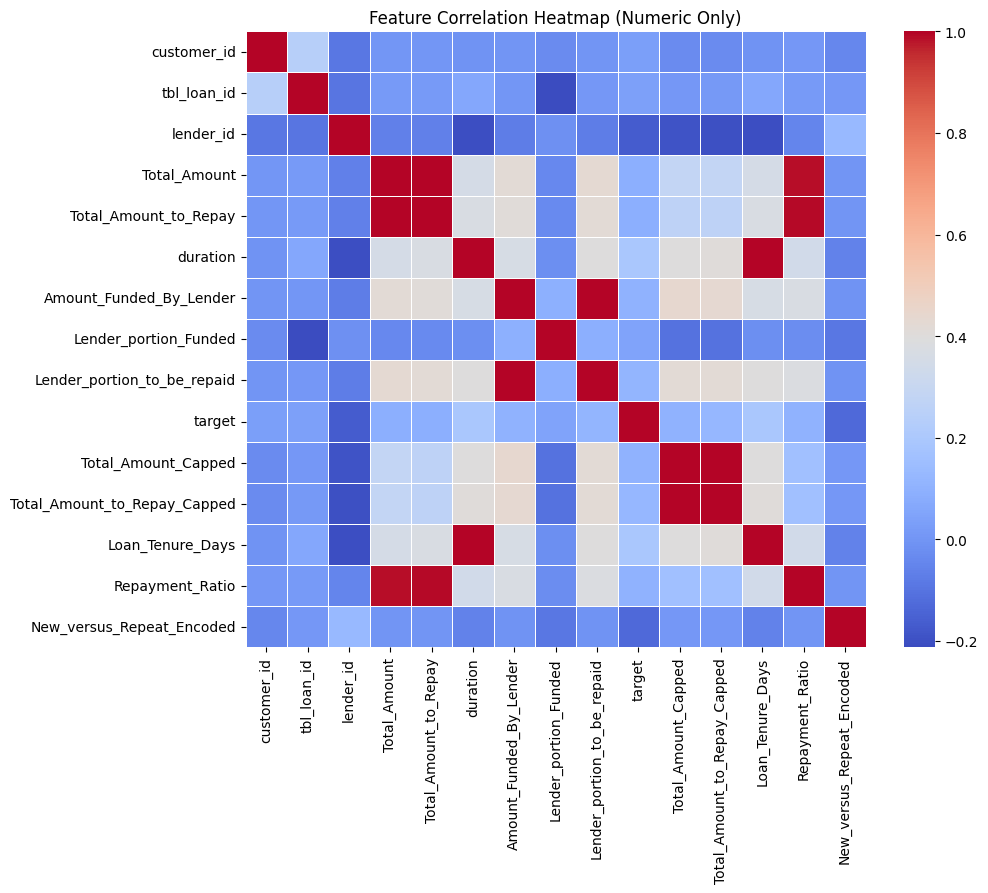

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target,Total_Amount_Capped,Total_Amount_to_Repay_Capped,Loan_Tenure_Days,Repayment_Ratio,New_versus_Repeat_Encoded
customer_id,1.000000,0.241670,-0.094086,0.000880,0.001162,-0.005274,-0.004126,-0.031184,-0.003058,0.030659,-0.031588,-0.031769,-0.005274,0.005035,-0.043016
tbl_loan_id,0.241670,1.000000,-0.099092,0.016275,0.015313,0.059921,0.004764,-0.213029,0.009076,0.035068,0.006846,0.010322,0.059921,0.015762,0.006845
lender_id,-0.094086,-0.099092,1.000000,-0.064935,-0.062589,-0.206143,-0.074546,-0.016221,-0.074143,-0.166202,-0.190588,-0.199138,-0.206143,-0.047666,0.130652
Total_Amount,0.000880,0.016275,-0.064935,1.000000,0.996759,0.354523,0.420987,-0.038000,0.426856,0.086043,0.282248,0.281259,0.354523,0.987671,-0.000212
Total_Amount_to_Repay,0.001162,0.015313,-0.062589,0.996759,1.000000,0.371108,0.410123,-0.036009,0.418614,0.087089,0.264236,0.263647,0.371108,0.993101,-0.000732
duration,-0.005274,0.059921,-0.206143,0.354523,0.371108,1.000000,0.364851,-0.019972,0.394855,0.189889,0.395558,0.406177,1.000000,0.337176,-0.057177
Amount_Funded_By_Lender,-0.004126,0.004764,-0.074546,0.420987,0.410123,0.364851,1.000000,0.093573,0.997542,0.101845,0.436627,0.435142,0.364851,0.370444,-0.006747
Lender_portion_Funded,-0.031184,-0.213029,-0.016221,-0.038000,-0.036009,-0.019972,0.093573,1.000000,0.085730,0.045418,-0.107272,-0.107084,-0.019972,-0.025168,-0.090109
Lender_portion_to_be_repaid,-0.003058,0.009076,-0.074143,0.426856,0.418614,0.394855,0.997542,0.085730,1.000000,0.109517,0.418777,0.418098,0.394855,0.381334,-0.008177
target,0.030659,0.035068,-0.166202,0.086043,0.087089,0.189889,0.101845,0.045418,0.109517,1.000000,0.103314,0.123267,0.189889,0.099838,-0.130334


In [29]:
# Plot correlation heatmap with numeric-only data
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap (Numeric Only)')
plt.show()

correlation_matrix

### Prepare Data for Model Training

In [30]:
# Selecting relevant features for the model
feature_columns = ['Total_Amount_Capped', 'Loan_Tenure_Days', 'Repayment_Ratio', 
                   'New_versus_Repeat_Encoded', 'duration', 'Amount_Funded_By_Lender', 
                   'Lender_portion_Funded']

X = train[feature_columns]
y = train['target']

In [32]:
# Splitting the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
# Summary of the split
{
    "Training Set Size": len(X_train),
    "Validation Set Size": len(X_valid),
    "Target Distribution in Training": y_train.value_counts(normalize=True).to_dict(),
    "Target Distribution in Validation": y_valid.value_counts(normalize=True).to_dict()
}

{'Training Set Size': 54923,
 'Validation Set Size': 13731,
 'Target Distribution in Training': {0: 0.9816834477359212,
  1: 0.0183165522640788},
 'Target Distribution in Validation': {0: 0.9816473672711383,
  1: 0.0183526327288617}}

### Standardization and normalization

In [35]:
# Features to scale
scaling_columns = ['Total_Amount_Capped', 'Loan_Tenure_Days', 'Repayment_Ratio', 
                   'duration', 'Amount_Funded_By_Lender', 'Lender_portion_Funded']

In [36]:
# Initialize scaler
scaler = StandardScaler()

# Scale features
X_train_scaled = X_train.copy()
X_valid_scaled = X_valid.copy()
X_train_scaled[scaling_columns] = scaler.fit_transform(X_train[scaling_columns])
X_valid_scaled[scaling_columns] = scaler.transform(X_valid[scaling_columns])

In [37]:
# Summary of scaled features
scaled_summary = {
    "Training Set - Scaled (Sample)": X_train_scaled.head(),
    "Validation Set - Scaled (Sample)": X_valid_scaled.head(),
    "Scaler Parameters": {
        "Mean": scaler.mean_.tolist(),
        "Variance": scaler.var_.tolist()
    }
}

scaled_summary

{'Training Set - Scaled (Sample)':        Total_Amount_Capped  Loan_Tenure_Days  Repayment_Ratio  \
 8166             -0.461100         -0.116791        -0.037887   
 30027            -0.463371         -0.116791        -0.013030   
 380              -0.004062         -0.116791        -0.037887   
 29448            -0.451184         -0.116791        -0.037661   
 61352            -0.261855         -0.417895        -0.027590   
 
        New_versus_Repeat_Encoded  duration  Amount_Funded_By_Lender  \
 8166                           1 -0.116791                -0.133128   
 30027                          1 -0.116791                -0.199784   
 380                            1 -0.116791                -0.199784   
 29448                          1 -0.116791                -0.199784   
 61352                          1 -0.417895                -0.065800   
 
        Lender_portion_Funded  
 8166                0.626549  
 30027              -1.693291  
 380                -1.693291  
 29448

### Handle imbalances

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
# Addressing class imbalance using SMOTE
smote = SMOTE(random_state=42)

In [40]:
# Apply SMOTE on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [41]:
# Checking the distribution of the target after resampling
resampled_distribution = {
    "Original Target Distribution": y_train.value_counts(normalize=True).to_dict(),
    "Resampled Target Distribution": y_train_resampled.value_counts(normalize=True).to_dict(),
    "Resampled Training Set Size": len(X_train_resampled)
}

resampled_distribution

{'Original Target Distribution': {0: 0.9816834477359212,
  1: 0.0183165522640788},
 'Resampled Target Distribution': {0: 0.5, 1: 0.5},
 'Resampled Training Set Size': 107834}

## Model Development

In [42]:
# Initialize Random Forest model with class weights
rf_model = RandomForestClassifier(class_weight={0: 0.509, 1: 27.298}, random_state=42, n_jobs=-1)

In [43]:
# Train Random Forest on unscaled data
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.509, 1: 27.298}, n_jobs=-1,
                       random_state=42)

In [44]:
# Predictions using Random Forest
rf_preds = rf_model.predict(X_valid)

In [45]:
# Evaluation
rf_f1 = f1_score(y_valid, rf_preds)
rf_conf_matrix = confusion_matrix(y_valid, rf_preds)

In [46]:
# Summary of results
{
    "Random Forest F1 Score": rf_f1,
    "Random Forest Confusion Matrix": rf_conf_matrix.tolist()
}

{'Random Forest F1 Score': np.float64(0.8588709677419355),
 'Random Forest Confusion Matrix': [[13448, 31], [39, 213]]}

Performance Metrics

F1 Score: 0.859


Confusion Matrix:

*13448* - True Negatives

*31* - False Positives


 *39* - False Negatives
 
 *213* - True Positives

### Feature Importance Analysis

In [47]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc

In [48]:
# Feature Importance Analysis
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

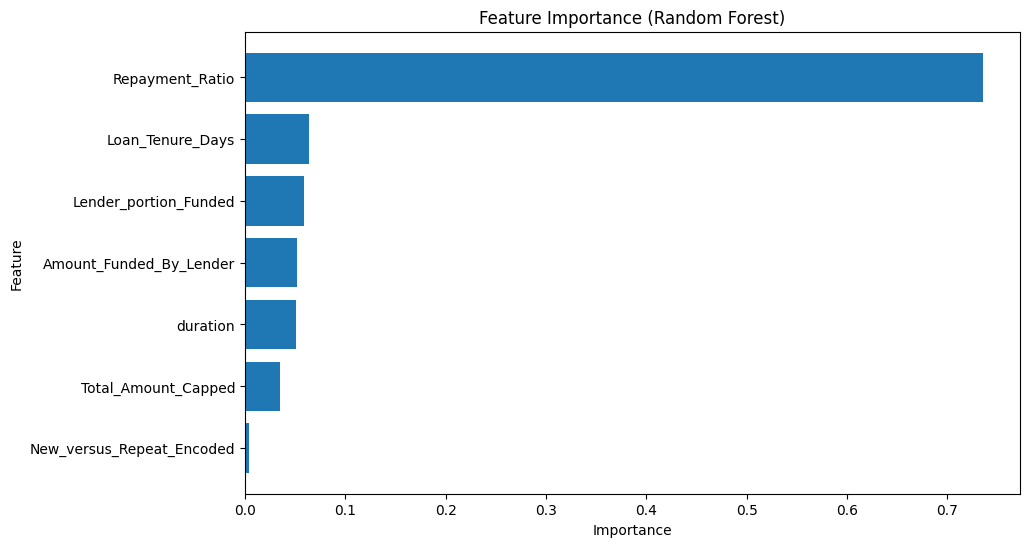

In [49]:
# Visualization of Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

The most influential features for Random Forest predictions:

Repayment Ratio: Importance = 0.736 (dominates the model’s decisions).

Loan Tenure Days: Importance = 0.064.

Lender Portion Funded: Importance = 0.059.

Amount Funded By Lender: Importance = 0.052.

This analysis shows that repayment-related features heavily influence the model's ability to predict loan defaults.

In [50]:
# Predictions for ROC-AUC and Precision-Recall curves
rf_probs = rf_model.predict_proba(X_valid)[:, 1]

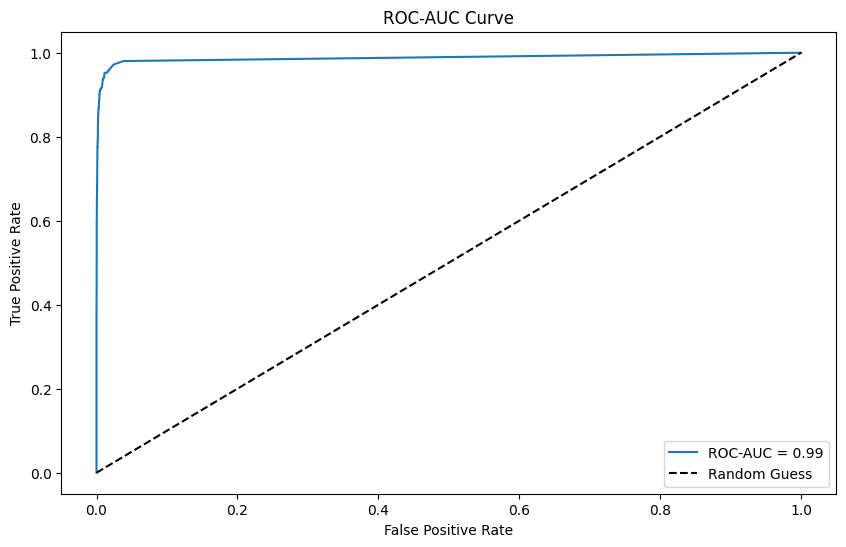

In [51]:
# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_valid, rf_probs)
roc_auc = roc_auc_score(y_valid, rf_probs)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.title("ROC-AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

ROC-AUC Score: Reflects the model's ability to distinguish between classes.

The curve suggests strong separation, indicating good performance.

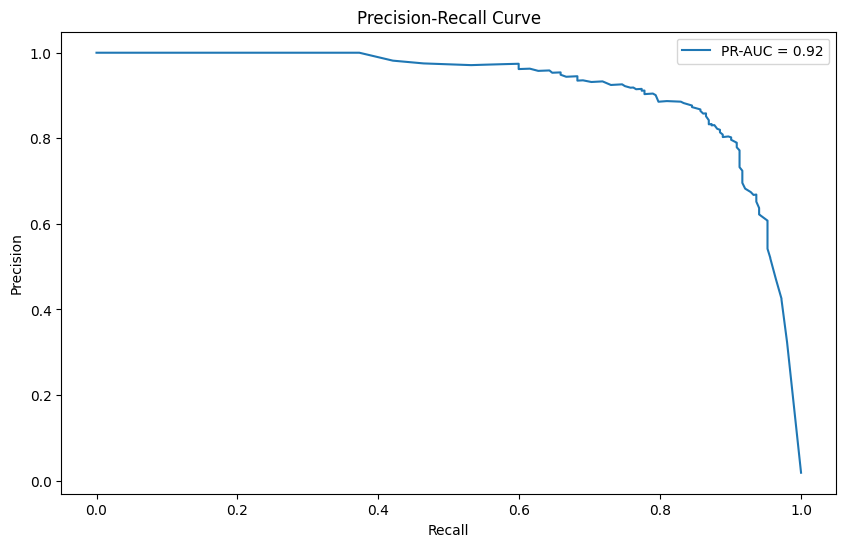

,Feature,Importance
2,Repayment_Ratio,0.735583
1,Loan_Tenure_Days,0.063726
6,Lender_portion_Funded,0.059055
5,Amount_Funded_By_Lender,0.052035
4,duration,0.050969
0,Total_Amount_Capped,0.034591
3,New_versus_Repeat_Encoded,0.004041


In [52]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_valid, rf_probs)
pr_auc = auc(recall, precision)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f"PR-AUC = {pr_auc:.2f}")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

feature_importance_df

PR-AUC Score: Measures performance on the minority class (defaults).

The curve highlights the model's effectiveness in handling the imbalanced dataset.

### Hyperparameter Tuning

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [55]:
# Initialize the Random Forest model
rf_tuning_model = RandomForestClassifier(class_weight={0: 0.509, 1: 27.298}, random_state=42, n_jobs=-1)

# GridSearchCV for Hyperparameter Tuning
grid_search = GridSearchCV(estimator=rf_tuning_model, param_grid=param_grid, scoring='f1', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight={0: 0.509,
                                                            1: 27.298},
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=1)

In [56]:
# Best parameters and corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [57]:
# Train the final Random Forest model with the best parameters
final_rf_model = grid_search.best_estimator_
final_rf_preds = final_rf_model.predict(X_valid)

In [58]:
# Evaluation on the validation set
final_rf_f1 = f1_score(y_valid, final_rf_preds)
final_rf_conf_matrix = confusion_matrix(y_valid, final_rf_preds)

{
    "Best Parameters": best_params,
    "Best Cross-Validated F1 Score": best_score,
    "Final Random Forest F1 Score": final_rf_f1,
    "Final Random Forest Confusion Matrix": final_rf_conf_matrix.tolist()
}

{'Best Parameters': {'max_depth': 30,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 100},
 'Best Cross-Validated F1 Score': np.float64(0.8323806749152508),
 'Final Random Forest F1 Score': np.float64(0.8512241054613936),
 'Final Random Forest Confusion Matrix': [[13426, 53], [26, 226]]}

### Credit Scoring Function

In [60]:
# Credit Scoring Function: Scale probabilities to a desired range
def scale_to_score(probabilities, min_score=300, max_score=850):
    """
    Scale predicted probabilities to a credit score range.

    Parameters:
        probabilities (array-like): Predicted probabilities for the positive class (defaults = 1).
        min_score (int): Minimum score of the credit range.
        max_score (int): Maximum score of the credit range.

    Returns:
        scores (list): Scaled credit scores.
    """
    return max_score - (max_score - min_score) * probabilities

In [61]:
# Predicted probabilities from the Random Forest model (assuming rf_probs_validation is available)
rf_probs_validation = final_rf_model.predict_proba(X_valid)[:, 1]  # Default probabilities


In [63]:
credit_scores = scale_to_score(rf_probs_validation, min_score=300, max_score=850)

In [64]:
# Create a DataFrame for the credit scoring results
credit_scoring_results = pd.DataFrame({
    "Predicted_Probability": rf_probs_validation,
    "Credit_Score": credit_scores,
    "Actual_Target": y_valid.values
})

# Display sample of the scoring results
credit_scoring_results.head()

,Predicted_Probability,Credit_Score,Actual_Target
0,0.739753,443.136104,0
1,0.000000,850.000000,0
2,0.712043,458.376148,1
3,0.000000,850.000000,0
4,0.000000,850.000000,0


## Evaluate Fairness

In [65]:
# Split validation data into groups based on the sensitive attribute (e.g., 'New_versus_Repeat_Encoded')
group_new = X_valid[X_valid["New_versus_Repeat_Encoded"] == 0]
group_repeat = X_valid[X_valid["New_versus_Repeat_Encoded"] == 1]

In [66]:
# Ground truth for each group
y_new = y_valid[group_new.index]
y_repeat = y_valid[group_repeat.index]

In [67]:
# Predictions and probabilities for each group
preds_new = final_rf_model.predict(group_new)
preds_repeat = final_rf_model.predict(group_repeat)
probs_new = final_rf_model.predict_proba(group_new)[:, 1]
probs_repeat = final_rf_model.predict_proba(group_repeat)[:, 1]

In [68]:
# Calculate fairness metrics for each group
def calculate_metrics(y_true, y_pred, y_prob):
    """
    Calculate fairness metrics for a specific group.

    Parameters:
        y_true: Ground truth labels.
        y_pred: Predicted labels.
        y_prob: Predicted probabilities.

    Returns:
        A dictionary of metrics (precision, recall, F1, and positive rate).
    """
    metrics = {
        "Precision": classification_report(y_true, y_pred, output_dict=True)["1"]["precision"],
        "Recall": classification_report(y_true, y_pred, output_dict=True)["1"]["recall"],
        "F1 Score": classification_report(y_true, y_pred, output_dict=True)["1"]["f1-score"],
        "Positive Rate": (y_pred == 1).mean(),
        "Average Predicted Probability": y_prob.mean()
    }
    return metrics

In [69]:
# Metrics for New Loans and Repeat Loans groups
metrics_new = calculate_metrics(y_new, preds_new, probs_new)
metrics_repeat = calculate_metrics(y_repeat, preds_repeat, probs_repeat)

# Fairness evaluation summary
fairness_summary = {
    "New Loans (Group 0)": metrics_new,
    "Repeat Loans (Group 1)": metrics_repeat
}

fairness_summary

{'New Loans (Group 0)': {'Precision': 0.9375,
  'Recall': 1.0,
  'F1 Score': 0.967741935483871,
  'Positive Rate': np.float64(0.26229508196721313),
  'Average Predicted Probability': np.float64(0.25823032220080916)},
 'Repeat Loans (Group 1)': {'Precision': 0.7935222672064778,
  'Recall': 0.8828828828828829,
  'F1 Score': 0.835820895522388,
  'Positive Rate': np.float64(0.018149753839371004),
  'Average Predicted Probability': np.float64(0.018734928128566582)}}

**New Loans (Group 0):** Customers receiving their first loan.

* Among customers predicted as likely defaulters, 93.75% were actual defaulters.

* The model performs very well in identifying actual defaulters for this group.

* The model correctly identifies all actual defaulters in this group. *(Recall = 100%)*

* High F1 Score indicates excellent balance between precision and recall. *(F1 Score = 96.77%)*

* 26.23% of customers in this group were predicted as likely defaulters.
The model is more lenient in predicting defaults for first-time borrowers. *(Positive Rate = 26.23%)*

* The model assigns a default probability of 25.82% to customers in this group.

* Higher recall and positive rate suggest that the model is more sensitive to identifying defaults among New Loans.
***

**Repeat Loans (Group 1):** Customers who have taken loans before.

* For repeat customers, 79.35% of predicted defaulters were correct.
Slightly lower precision indicates the model has more False Positives in this group.

* The model captures 88.29% of actual defaulters.
Misses about 11.71% of defaulters, indicating room for improvement.

* A slightly lower F1 Score (**83.58%**) reflects reduced performance compared to New Loans, especially in recall.

* Only 1.81% of customers in this group were flagged as likely defaulters.
Indicates a stricter threshold for predicting defaults among repeat customers

* Repeat customers are assigned much lower default probabilities on average.

* Lower precision, recall, and positive rate indicate that the model applies stricter criteria for Repeat Loans, which could lead to underestimating risk for this group.

## Run the test data predictions

In [70]:
# process similarly to the train data
test['disbursement_date'] = pd.to_datetime(test['disbursement_date'], errors='coerce')
test['due_date'] = pd.to_datetime(test['due_date'], errors='coerce')

In [71]:
# Cap outliers and create derived features for the test data
test['Total_Amount_Capped'] = cap_outliers(test['Total_Amount'])
test['Total_Amount_to_Repay_Capped'] = cap_outliers(test['Total_Amount_to_Repay'])
test['Loan_Tenure_Days'] = (test['due_date'] - test['disbursement_date']).dt.days
test['Repayment_Ratio'] = test['Total_Amount_to_Repay'] / test['Total_Amount_Capped']
test['New_versus_Repeat_Encoded'] = test['New_versus_Repeat'].map({'New Loan': 0, 'Repeat Loan': 1})

In [78]:
# Select and scale features
X_test = test[feature_columns]
X_test_scaled = X_test.copy()
X_test_scaled[scaling_columns] = scaler.transform(X_test[scaling_columns])

In [74]:
# Predict probabilities and outcomes for the unified test data
rf_probs_test = final_rf_model.predict_proba(X_test_scaled)[:, 1]  # Predicted probabilities
rf_preds_test = final_rf_model.predict(X_test_scaled)  # Predicted labels

In [75]:
# Scale probabilities to credit scores (300-850 range)
credit_scores_test = scale_to_score(rf_probs_test, min_score=300, max_score=850)

In [76]:
# Create a unified DataFrame for the test scoring results
test['Predicted_Probability'] = rf_probs_test
test['Credit_Score'] = credit_scores_test
test['Predicted_Target'] = rf_preds_test

In [77]:
# Display a sample of the scoring results
test[['Predicted_Probability', 'Credit_Score', 'Predicted_Target']].head()

,Predicted_Probability,Credit_Score,Predicted_Target
0,0.0,850.0,0
1,0.0,850.0,0
2,0.0,850.0,0
3,0.0,850.0,0
4,0.0,850.0,0


In [81]:
#  Prepare the submission DataFrame
submission = pd.DataFrame({
    "ID": test["ID"],
    "Target": rf_preds_test
})

# Save to CSV
submission_file_path = "model_prediction/submission.csv"
submission.to_csv(submission_file_path, index=False)

print(f"Submission file saved to {submission_file_path}.")

Submission file saved to model_prediction/submission.csv.


In [82]:
df=pd.read_csv('model_prediction/submission.csv')
df.head()

,ID,Target
0,ID_269404226088267278,0
1,ID_255356300042267278,0
2,ID_257026243764267278,0
3,ID_264617299409267278,0
4,ID_247613296713267278,0


In [85]:
uniqueid = df['Target'].unique()
uniqueid

array([0, 1])

### EDA

In [7]:
def plot_continuous(df, column, transform=None):
    """
    Plots visualizations for a continuous variable, showing the distribution and boxplot for both
    the original and transformed versions of the data.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        column (str): The column name of the continuous variable to plot.
        transform (str, optional): Transformation to apply to the data before plotting.
                                  Accepted values are 'log' or 'sqrt'. Default is None, which means no transformation.

    This function generates:
        - A histogram with a kernel density estimate (KDE) for the original data.
        - A boxplot for the original data.
        - If a transformation is specified ('log' or 'sqrt'):
            - A histogram with a KDE for the transformed data.
            - A boxplot for the transformed data.
    """
    # Create subplots for visualizations
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))

    # Original data plots
    sns.histplot(df[column], kde=True, ax=axs[0, 0])
    axs[0, 0].set_title(f'Distribution of {column}')
    axs[0, 0].set_xlabel(column)

    sns.boxplot(y=df[column], ax=axs[1, 0])
    axs[1, 0].set_title(f'Box Plot of {column}')
    axs[1, 0].set_ylabel(column)

    # Transformations (log or square root)
    if transform == 'log':
        transformed_data = np.log1p(df[column])  # log1p handles log(0) gracefully
        transform_label = 'Log'
    elif transform == 'sqrt':
        transformed_data = np.sqrt(df[column])  # Square root transformation
        transform_label = 'Square Root'
    else:
        transformed_data = None  # No transformation if not specified

    # If transformed data exists, generate corresponding plots
    if transformed_data is not None:
        sns.histplot(transformed_data, kde=True, ax=axs[0, 1])
        axs[0, 1].set_title(f'{transform_label} Distribution of {column}')
        axs[0, 1].set_xlabel(f'{transform_label}({column})')

        sns.boxplot(y=transformed_data, ax=axs[1, 1])
        axs[1, 1].set_title(f'{transform_label} Box Plot of {column}')
        axs[1, 1].set_ylabel(f'{transform_label}({column})')
    else:
        # If no transformation, remove the second set of axes
        for ax in [axs[0, 1], axs[1, 1]]:
            ax.remove()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


def plot_categorical(df, column):
    """
    Plots visualizations for a categorical variable, including a bar plot and a pie chart.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        column (str): The column name of the categorical variable to plot.

    This function generates:
        - A bar plot showing the counts of each category in the specified column.
        - A pie chart showing the relative proportions of each category.
    """
    # Create subplots for visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Bar plot showing counts of each category
    value_counts = df[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax1)
    ax1.set_title(f'Bar Plot of {column}')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # Pie chart showing percentage distribution of each category
    ax2.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
    ax2.set_title(f'Pie Chart of {column}')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


#### Categorical exploration

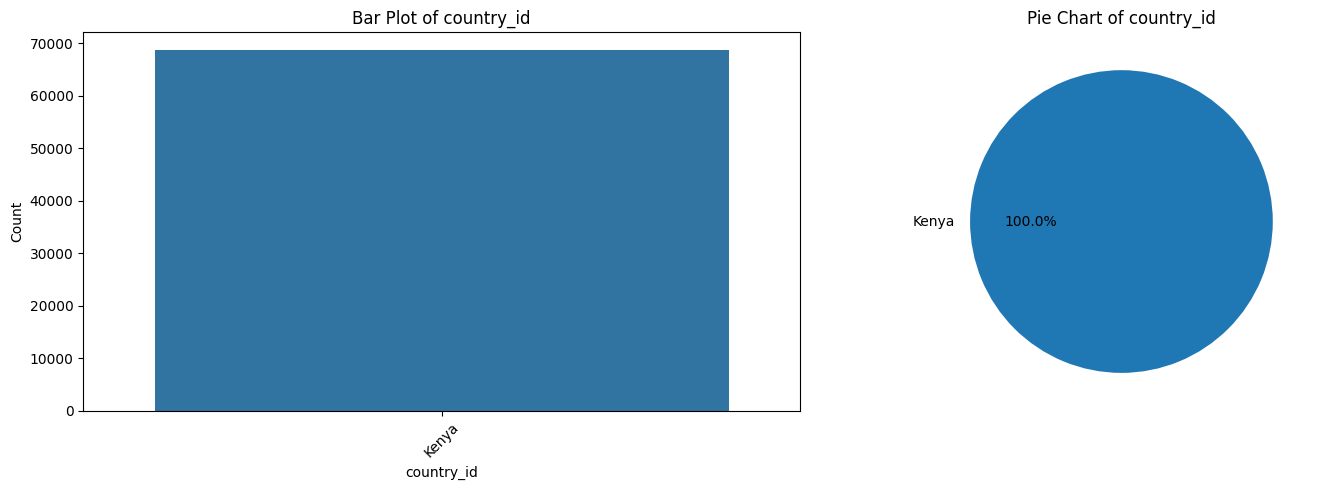

In [8]:
plot_categorical(train, 'country_id')

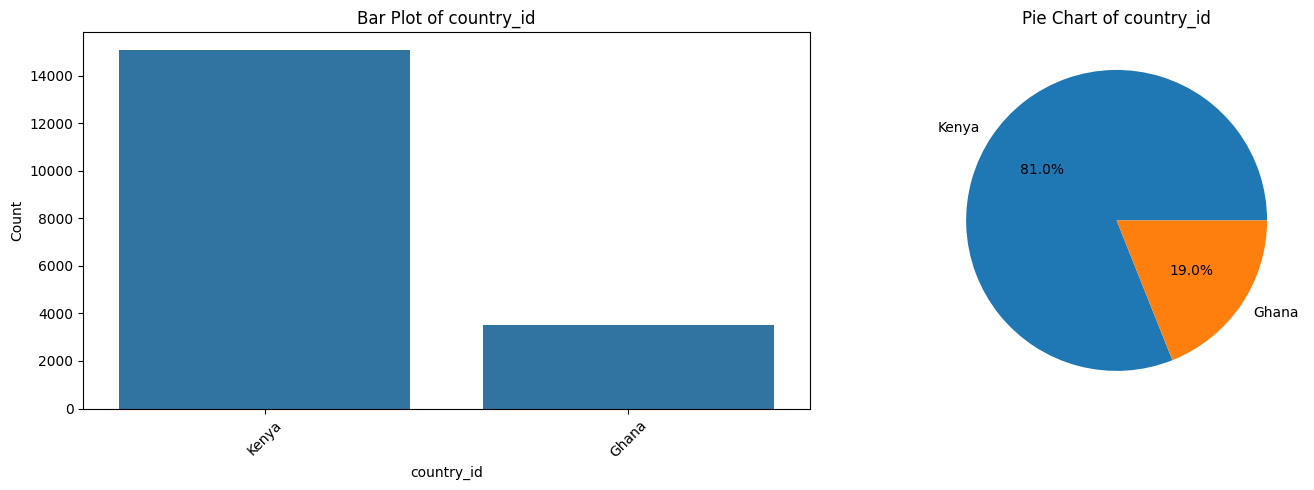

In [9]:
plot_categorical(test, 'country_id')

##### This shows that test has a new country, ghana so one of the goals is to build a solution that can generalize well in new regions

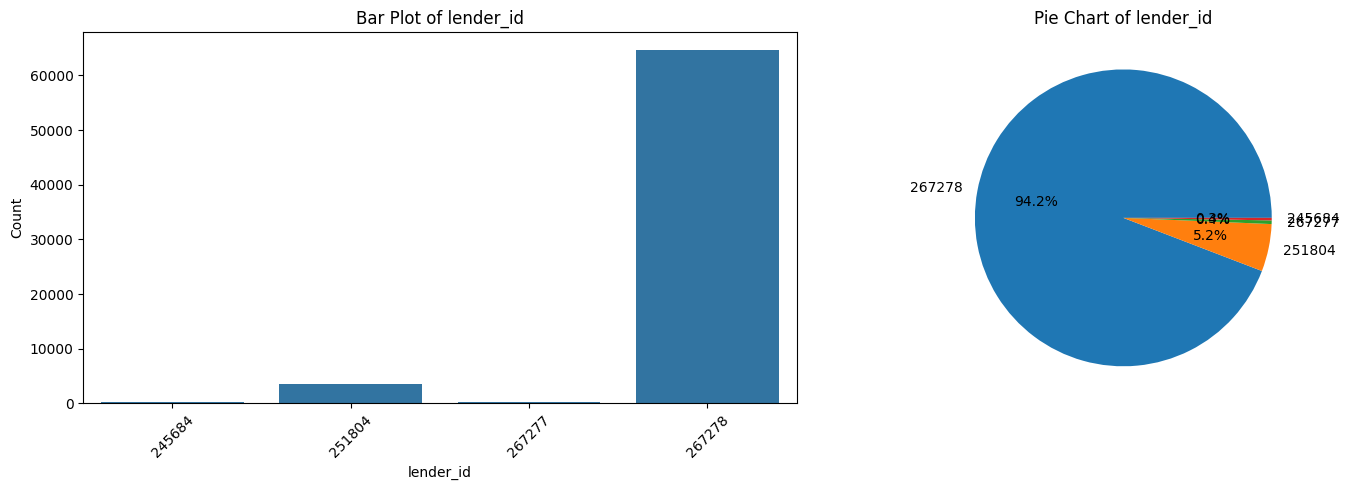

In [10]:
plot_categorical(train, 'lender_id')

##### You can exploree more of the categorical columns as well

#### TARGET EXPLORATION


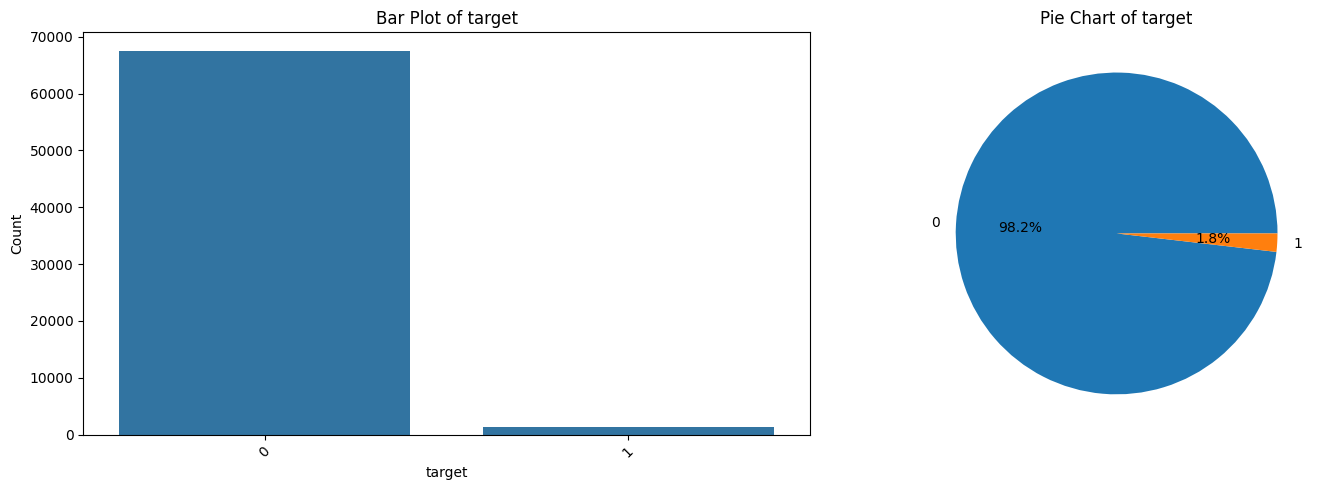

In [11]:
plot_categorical(train, 'target')

##### You can see the dataset is highly imbalanced , and this is expected in loan default scenarios, So find  ways to deal with the  imbalance

### CONTINUOUS COLUMN EXPLORATION

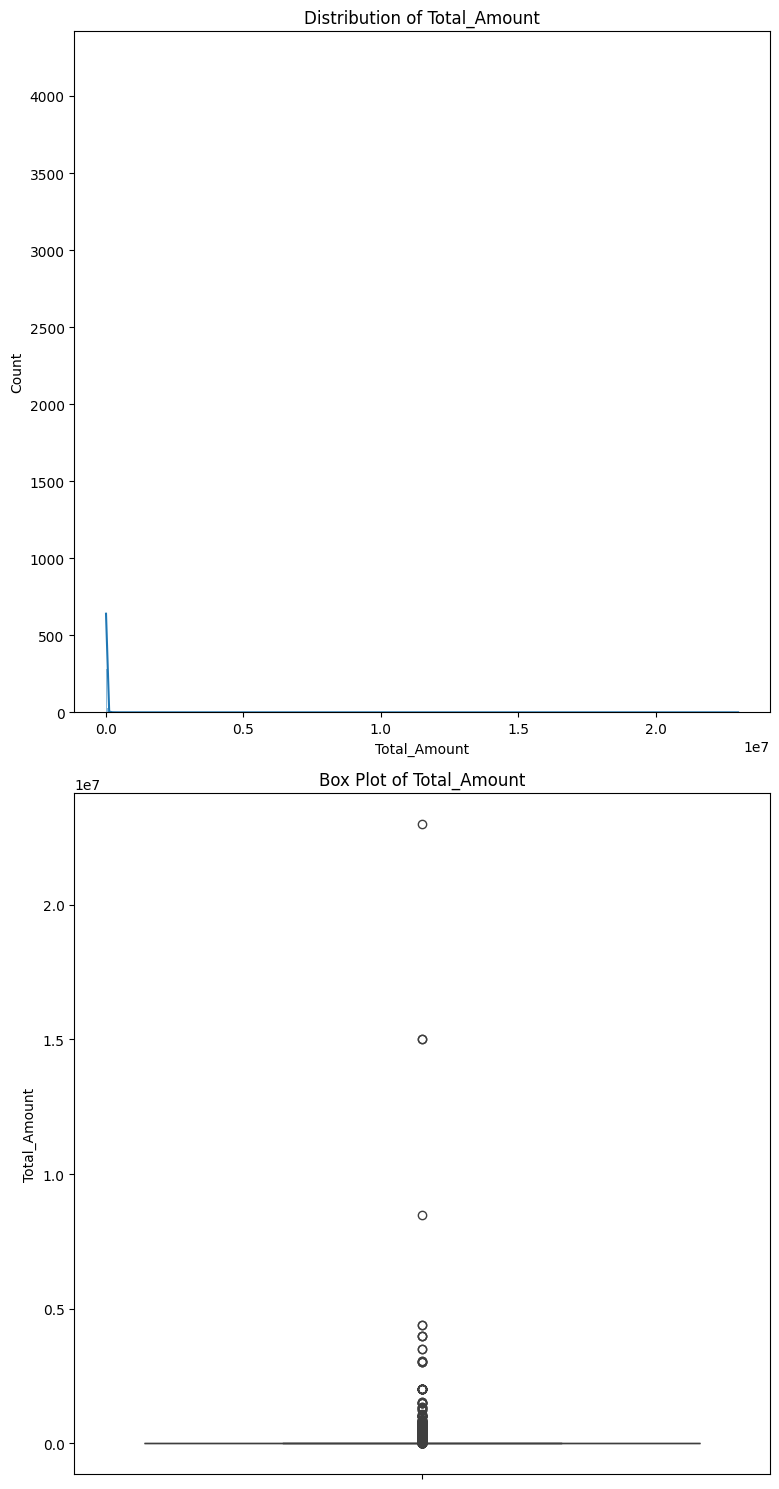

In [12]:
plot_continuous(train, 'Total_Amount')

Are those outliers?
##### You can explore more of the given numerical columns as well

### Feature Engineering
* So here we are going to concatenate both the train and test so that we can do the processing once instead of repeating for each

In [13]:
data = pd.concat([train, test]).reset_index(drop=True)

# Convert the datetime columns appropriately
date_cols = ['disbursement_date', 'due_date']
for col in date_cols:
    data[col] = pd.to_datetime(data[col])
    # Extract month, day, and year from the date columns
    data[col+'_month'] = data[col].dt.month
    data[col+'_day'] = data[col].dt.day
    data[col+'_year'] = data[col].dt.year

# Select all categorical columns from the dataset and label encode them or one hot encode
cat_cols = data.select_dtypes(include='object').columns
num_cols = [col for col in data.select_dtypes(include='number').columns if col not in ['target']]
print(f"The categorical columns are: {cat_cols}.")
print("-"* 100)
print(f"The numerical columns are: {num_cols}")
print("-"* 100)
# we are going to one  hot encode the loan type
data = pd.get_dummies(data, columns=['loan_type'], prefix='loan_type', drop_first=False)
# Convert all the columns with prefix loan_type_ to 0/1 instead of False/True
loan_type_cols = [col for col in data.columns if col.startswith('loan_type_')]
data[loan_type_cols] = data[loan_type_cols].astype(int)

# Label-encoding for the other remaining categorical columns
le = LabelEncoder()
for col in [col for col in cat_cols if col not in ['loan_type', 'ID']]:
    data[col] = le.fit_transform(data[col])


# deal with numerical columns: we saw loan amount is  highly right skewed for this we can log transform it
data['Total_Amount'] = np.log1p(data['Total_Amount']) # study other numerical columns and see if they are skewed as well

# Splitting the data back into train and test
train_df = data[data['ID'].isin(train['ID'].unique())]

test_df = data[data['ID'].isin(test['ID'].unique())]

# we are also going to drop the country id as we saw we have only one country in train
features_for_modelling = [col for col in train_df.columns if col not in date_cols + ['ID', 'target', 'country_id']]

# Check if the new datasets have the same rows as train and test datasets
print(f"The shape of train_df is: {train_df.shape}")
print(f"The shape of test_df is: {test_df.shape}")
print(f"The shape of train is: {train.shape}")
print(f"The shape of test is: {test.shape}")
print(f"The features for modelling are:\n{features_for_modelling}")


The categorical columns are: Index(['ID', 'country_id', 'loan_type', 'New_versus_Repeat'], dtype='object').
----------------------------------------------------------------------------------------------------
The numerical columns are: ['customer_id', 'tbl_loan_id', 'lender_id', 'Total_Amount', 'Total_Amount_to_Repay', 'duration', 'Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_portion_to_be_repaid', 'disbursement_date_month', 'disbursement_date_day', 'disbursement_date_year', 'due_date_month', 'due_date_day', 'due_date_year']
----------------------------------------------------------------------------------------------------
The shape of train_df is: (68654, 45)
The shape of test_df is: (18594, 45)
The shape of train is: (68654, 16)
The shape of test is: (18594, 15)
The features for modelling are:
['customer_id', 'tbl_loan_id', 'lender_id', 'Total_Amount', 'Total_Amount_to_Repay', 'duration', 'New_versus_Repeat', 'Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_

### CROSS VALIDATION
* Here we are going to use a simple train test split but due to the imbalance try other robust methods like StratifiedKFold


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_df[features_for_modelling], train['target'], stratify=train['target'], shuffle=True, random_state=42)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(51490, 40) (17164, 40) (51490,) (17164,)


## Initialisation & Model Training

F1 Score: 0.2615
ROC AUC Score: 0.9285

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     16849
           1       0.16      0.80      0.26       315

    accuracy                           0.92     17164
   macro avg       0.58      0.86      0.61     17164
weighted avg       0.98      0.92      0.94     17164



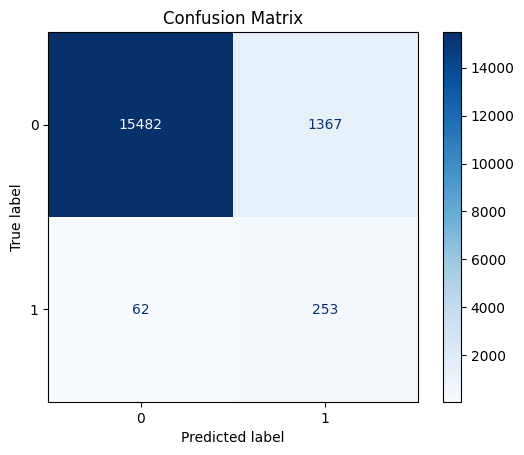

In [15]:

# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Logistic Regression Classifier
clf = LogisticRegression(
    random_state=42,
    class_weight="balanced",  # Handle class imbalance
)
clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = clf.predict(X_valid_scaled)
y_pred_proba = clf.predict_proba(X_valid_scaled)[:, 1]

# Evaluation Metrics
f1 = f1_score(y_valid, y_pred)
roc_auc = roc_auc_score(y_valid, y_pred_proba)

print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_valid, y_pred))

# Confusion Matrix
# Confusion Matrix Visualization
ConfusionMatrixDisplay.from_predictions(
    y_valid,
    y_pred,
    display_labels=clf.classes_,
    cmap=plt.cm.Blues
)
plt.title("Confusion Matrix")
plt.show()


### FEATURE IMPORTANCE

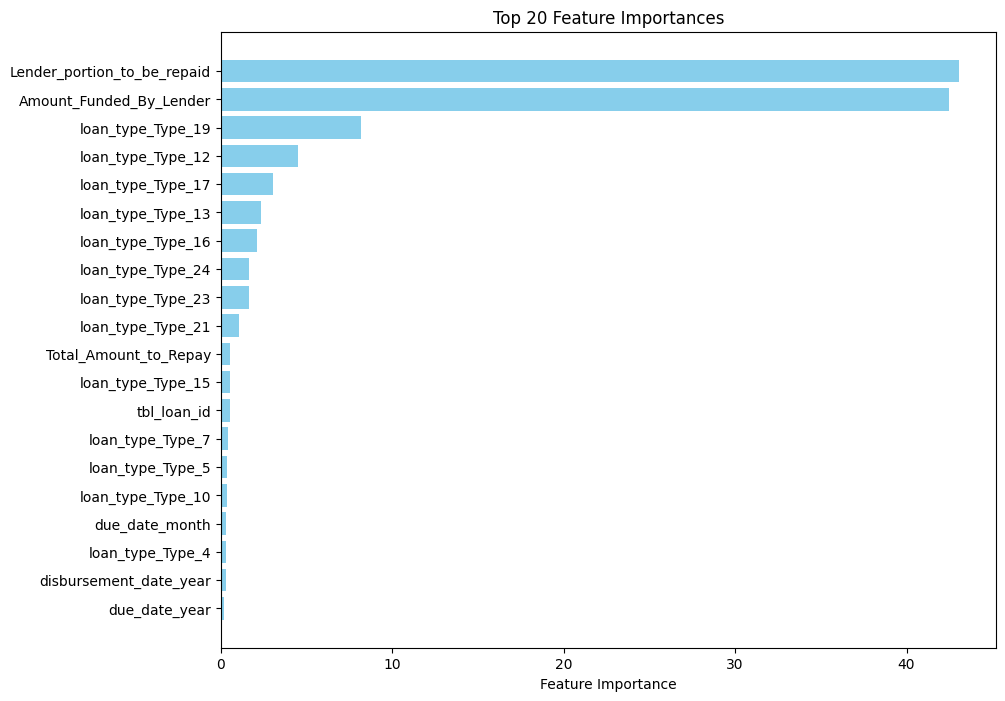

In [16]:
# Feature Importance

# Get the absolute values of the coefficients
feature_importances = np.abs(clf.coef_).flatten()

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': features_for_modelling,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot the top 20 feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances')
plt.show()

## Model Prediction & Inference

In [17]:
# Make predictions on the test dataset
test_predictions = clf.predict(test_df[features_for_modelling])
test_predictions_proba = clf.predict_proba(test_df[features_for_modelling])[:, 1]

# Save the predictions to a CSV file

test_df['target'] = test_predictions
sub =  test_df[['ID', 'target']]
sub.head()


,ID,target
68654,ID_269404226088267278,0
68655,ID_255356300042267278,0
68656,ID_257026243764267278,0
68657,ID_264617299409267278,0
68658,ID_247613296713267278,0


In [18]:
sub.to_csv('baseline_submission.csv', index=False)

#### To Do
* Handle imbalance
* Do more feature engineering
* Use more sophisticated machine learning algorithms
##### Good luck

train['target].value_counts()